# Proyek Analisis Data: Bike Sharing Datasets
- **Nama: Regina Naraswari Dewi**
- **Email: rnaraswari@gmail.com**
- **ID Dicoding: reginaraswari**

## Menentukan Pertanyaan Bisnis

- Bagaimana banyak pengguna setiap season?
- Bagaimana banyak peminjaman di setiap bulan?
- Bagaimana pengaruh cuaca mempengeruhi pengunaan bike sharing?

## Import Semua Packages/Library yang Digunakan

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Wrangling

### Gathering Data

In [ ]:
 day_f1 = pd.read_csv('/content/gdrive/MyDrive/Bike-sharing-dataset/day.csv')
 day_f1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

###### Find Missing Value

In [ ]:
day_f1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data yang digunakan tidak memliki missing value

###### Find duplicat Value

In [ ]:
day_f1.duplicated().sum()

0

Tidak ditemukan adanya redudansi data

###### Find Outliner

In [ ]:
day_f1_numerics_only = day_f1.select_dtypes(include=np.number)
day_f1_numerics_only

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
q25, q75 = np.percentile(day_f1_numerics_only, 75), np.percentile(day_f1_numerics_only, 25)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

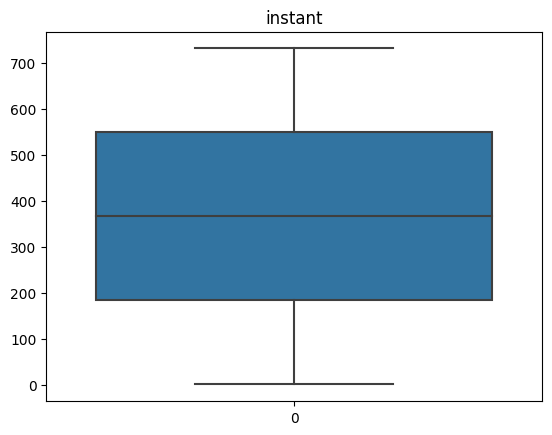

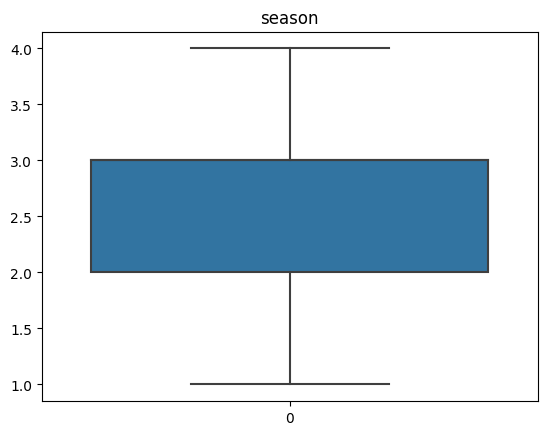

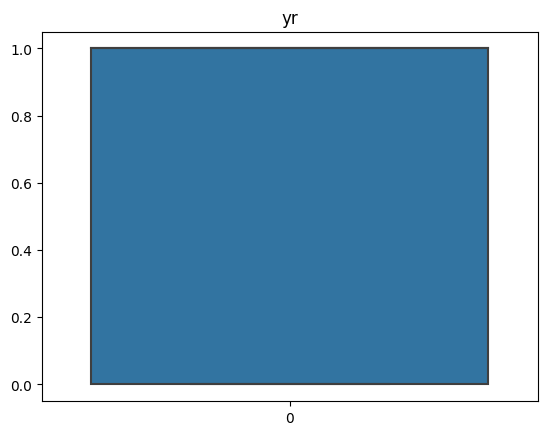

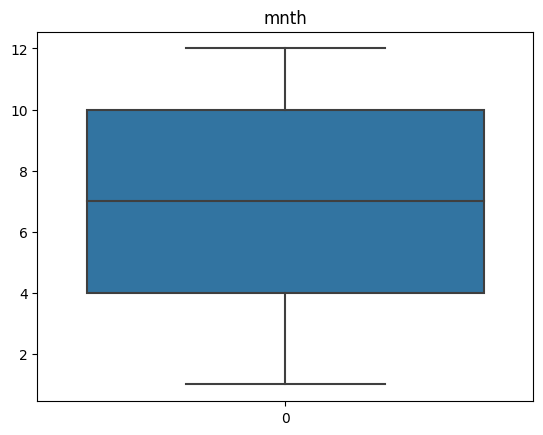

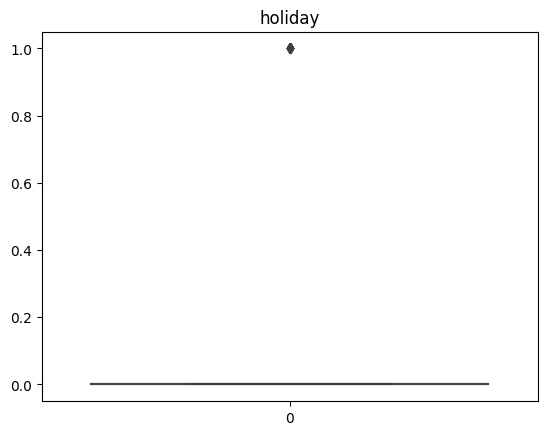

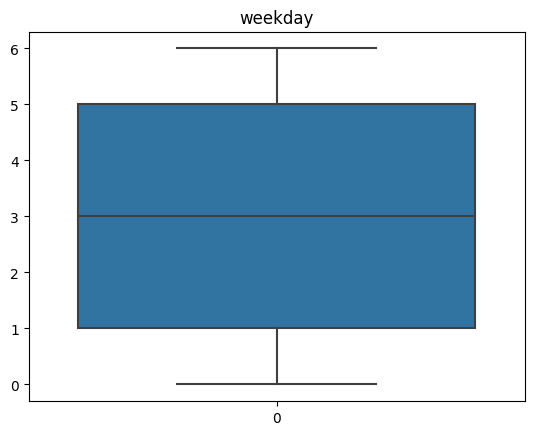

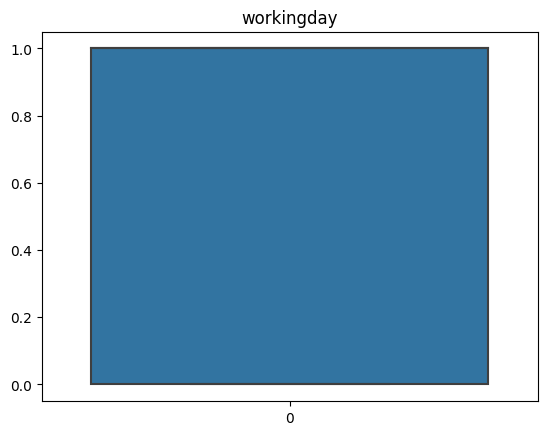

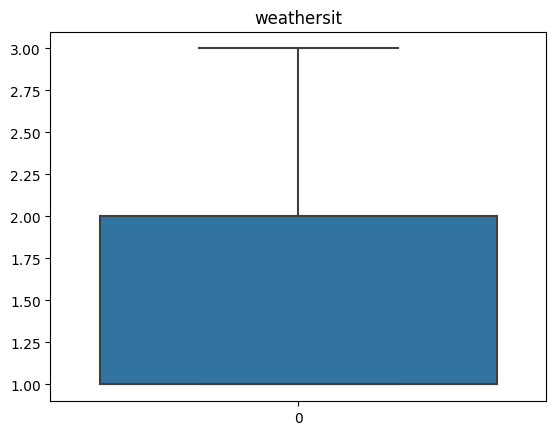

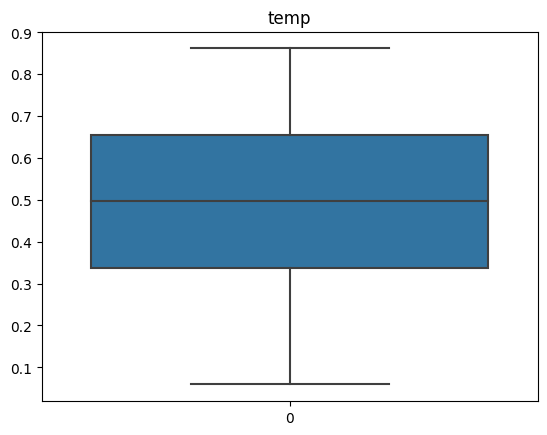

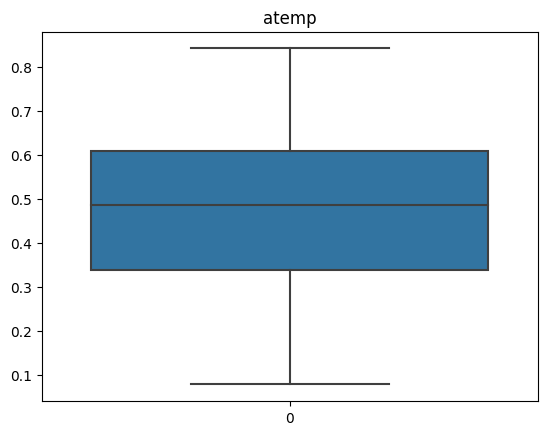

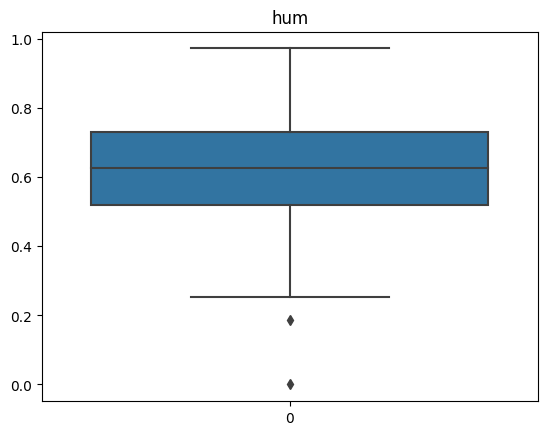

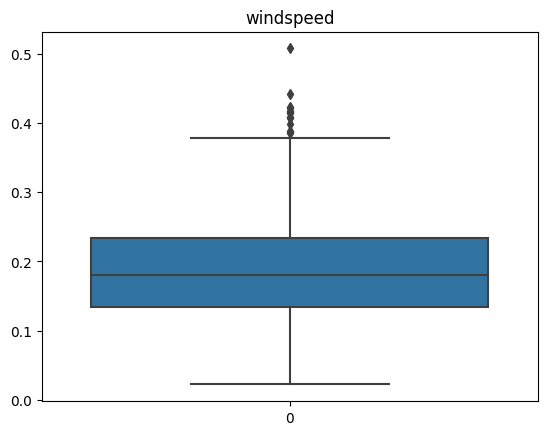

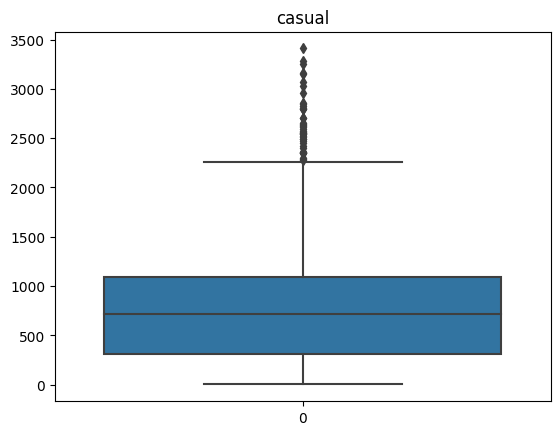

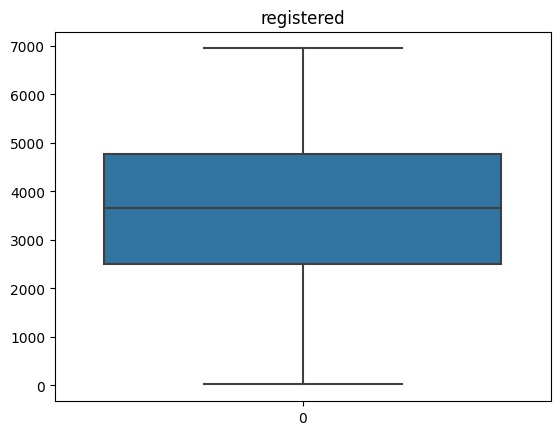

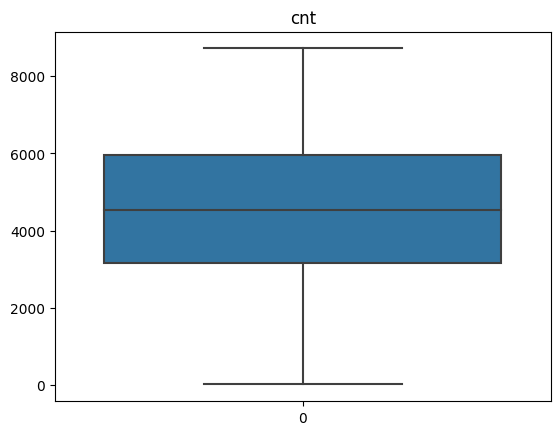

In [ ]:
for i in day_f1_numerics_only.columns:
  plt.figure()
  plt.title(i)
  sns.boxplot(day_f1_numerics_only[i])

Beberapa attribut memliki outliner, tetapi hal ini tidak berpengaruh sehingga belum perlu dilakukan data cleaning

### Cleaning Data

Hampir semua data yang diberikan bersih, sehingga data ini tidak memerlukan data cleaning

## Exploratory Data Analysis (EDA)

##### Explore ...

In [ ]:
day_f1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
mask = np.zeros_like(day_f1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<ipython-input-10-a80c8872b99f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(day_f1.corr(), dtype=np.bool)
<ipython-input-10-a80c8872b99f>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(day_f1.corr(), dtype=np.bool)


<ipython-input-11-ceed45fe79e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_f1.corr(),annot=True,mask=mask)


<Axes: >

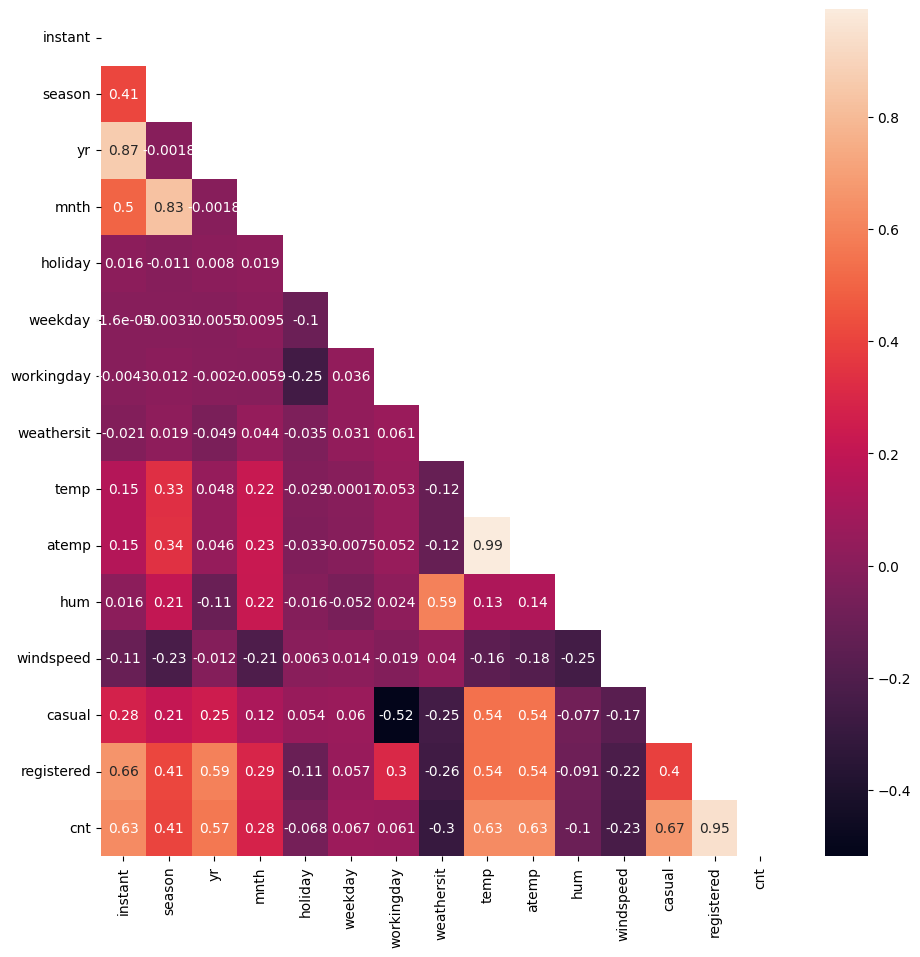

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(day_f1.corr(),annot=True,mask=mask)

Dari hasil korelasi data yang diberikan, korelasi antara attemp dan temp adalah yang paling tinggi.


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

<Figure size 1100x1100 with 0 Axes>

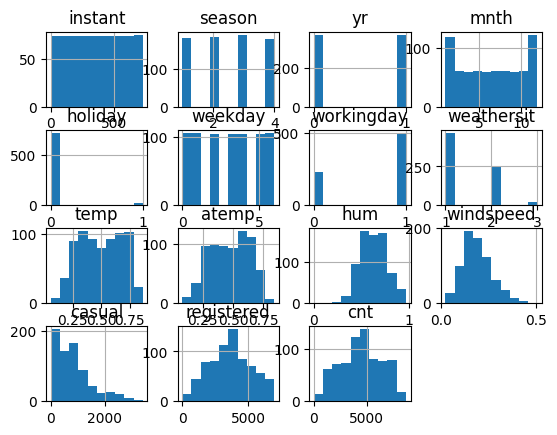

In [ ]:
plt.figure(figsize=(11,11))
day_f1.hist()

In [ ]:
day_f1.loc[day_f1["season"] == 1, "season"] = "Spring"
day_f1.loc[day_f1["season"] == 2, "season"] = "Summer"
day_f1.loc[day_f1["season"] == 3, "season"] = "Fall"
day_f1.loc[day_f1["season"] == 4, "season"] = "Winter"

day_f1.season.value_counts().sort_index()

Fall      188
Spring    181
Summer    184
Winter    178
Name: season, dtype: int64

In [ ]:
day_f1[['season','temp']].groupby('season').sum()

,temp
season,
Fall,132.786150
Spring,53.892306
Summer,100.170549
Winter,75.277275


Dari data ini terlihat bahwa summer memiliki transaksi terbanyak.

In [ ]:
day_f1.loc[day_f1["mnth"] == 1, "mnth"] = "January"
day_f1.loc[day_f1["mnth"] == 2, "mnth"] = "February"
day_f1.loc[day_f1["mnth"] == 3, "mnth"] = "March"
day_f1.loc[day_f1["mnth"] == 4, "mnth"] = "April"
day_f1.loc[day_f1["mnth"] == 5, "mnth"] = "Mei"
day_f1.loc[day_f1["mnth"] == 6, "mnth"] = "June"
day_f1.loc[day_f1["mnth"] == 7, "mnth"] = "July"
day_f1.loc[day_f1["mnth"] == 8, "mnth"] = "August"
day_f1.loc[day_f1["mnth"] == 9, "mnth"] = "September"
day_f1.loc[day_f1["mnth"] == 10, "mnth"] = "October"
day_f1.loc[day_f1["mnth"] == 11, "mnth"] = "November"
day_f1.loc[day_f1["mnth"] == 12, "mnth"] = "December"

day_f1.mnth.value_counts().sort_index()

April        60
August       62
December     62
February     57
January      62
July         62
June         60
March        62
Mei          62
November     60
October      62
September    60
Name: mnth, dtype: int64

In [ ]:
day_f1[['mnth','temp']].groupby('mnth').sum()

,temp
mnth,
April,28.199930
August,43.932057
December,20.089920
February,17.055907
January,14.659523
July,46.839166
June,41.045832
March,24.213403
Mei,36.877502


Dilihat dari angkanya, bulan Juli adalah bulan yang memiliki frekuensi tertinggi

In [ ]:
day_f1.loc[day_f1["weathersit"] == 1, "weathersit"] = "Clear"
day_f1.loc[day_f1["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_f1.loc[day_f1["weathersit"] == 3, "weathersit"] = "Light Snow"
day_f1.loc[day_f1["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_f1.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

[Text(0.5, 1.0, 'Count of bikes during different Season')]

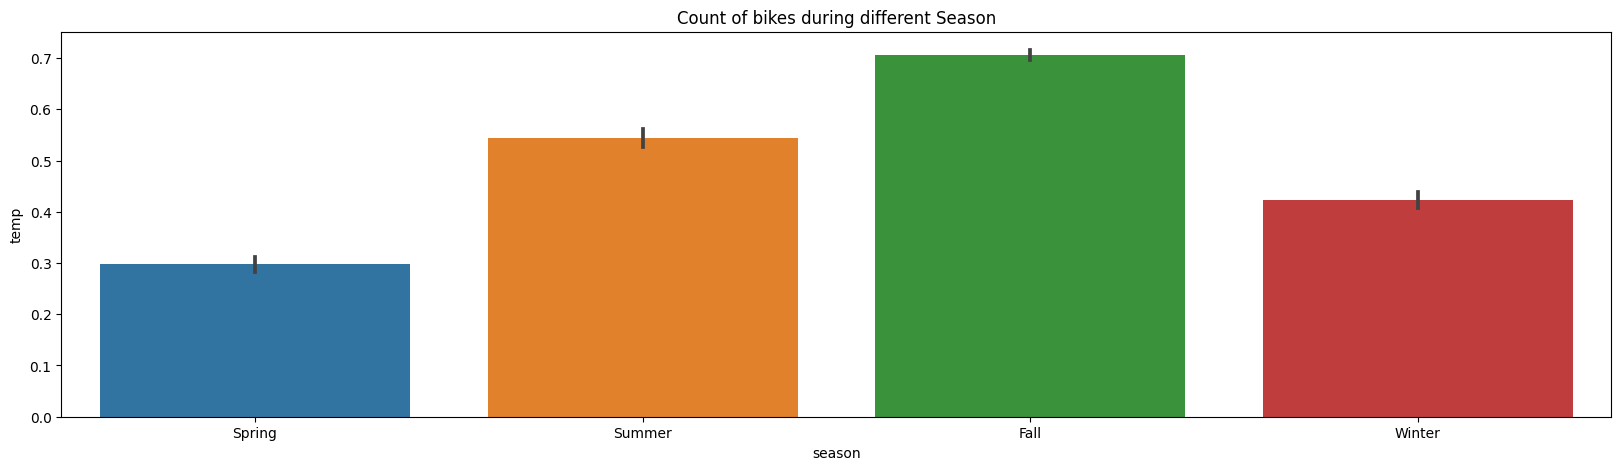

In [ ]:
fig ,ax = plt.subplots(figsize = (20,5))
sns.barplot(data = day_f1 , x= 'season', y = 'temp')
ax.set(title='Count of bikes during different Season')

### Pertanyaan 2:

[Text(0.5, 1.0, 'Count of bikes during different months')]

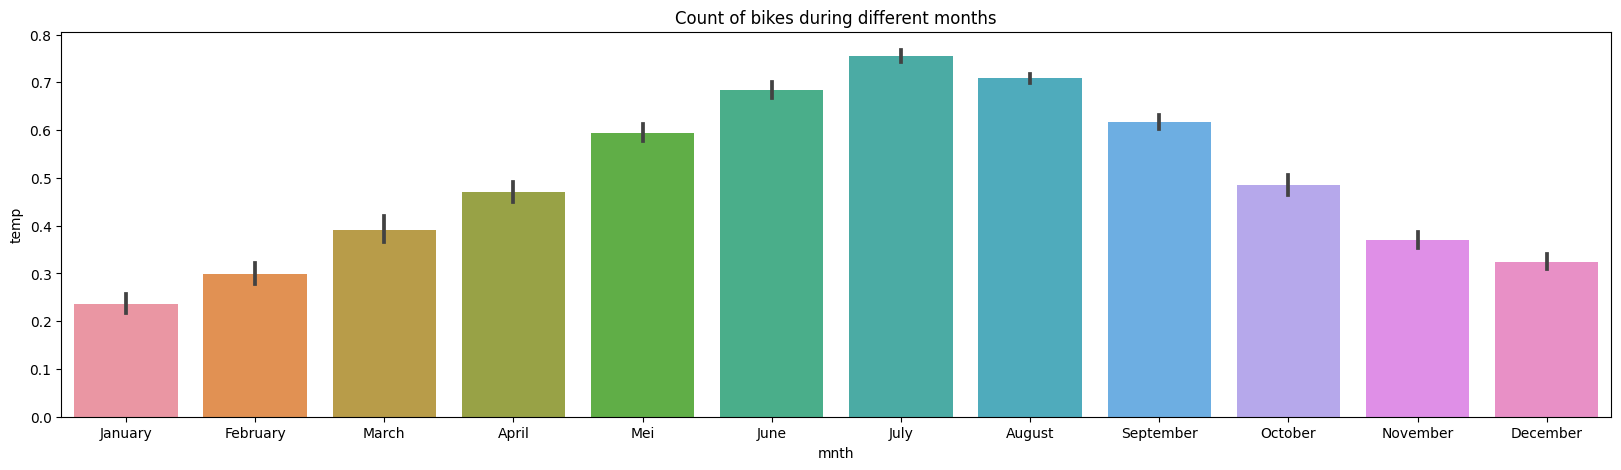

In [ ]:
fig ,ax = plt.subplots(figsize = (20,5))
sns.barplot(data = day_f1 , x= 'mnth', y = 'temp')
ax.set(title='Count of bikes during different months')

## Pertanyaan 3

In [ ]:
byseason_bike = day_f1.groupby(by="weathersit").instant.nunique().reset_index()
byseason_bike.rename(columns={"instant": "sum"}, inplace=True)
byseason_bike

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


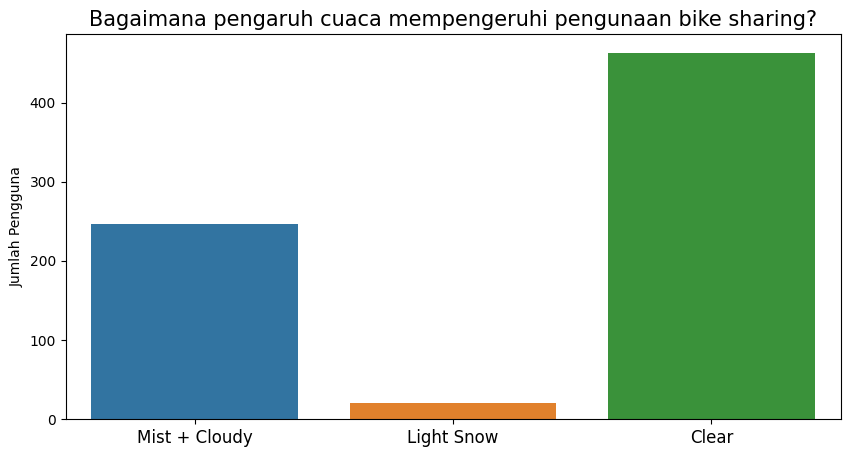

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=byseason_bike.sort_values(by="weathersit", ascending=False),
)
plt.title("Bagaimana pengaruh cuaca mempengeruhi pengunaan bike sharing?", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

- Peminjaman sepeda paling terbanyak terdapat pada musim ke 3, dimana peminjaman/rental terjadi sebanyak 1061129 kali dan paling sedikit terjadi di musim 1 dengan peminjaman terjadi sebanyak
- Peminjaman/rental sepeda berdasarkan bulan yang paling tertinggi yaitu pada bulan keenam dengan peminjaman sebanyak 346342 kali dan paling sedikit terjadi pada bulan kesatu
- Berdasarkan diagram di atas,  kondisi cuaca mempengaruhi jumlah pengguna bike sharing. Kondisi cuaca yang digunakan sebagian besar pengguna bike share adalah cerah atau “clear”, dan kondisi tersebut cocok untuk bersepeda dibandingkan  kondisi seperti cuaca mendung, hujan deras, atau salju.



In [ ]:
day_f1.to_csv("dashboard.csv", index=False)